In [24]:
# Import các thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler # Chuẩn hóa
from sklearn.metrics import classification_report, confusion_matrix # Import các metrics đánh giá cho bài toán phân loại
from sklearn.svm import SVC # Import Model Support Vector Machine
from sklearn.ensemble import RandomForestClassifier # Gọi Model Random Forest cho bài toán phân loại
import pickle # Lưu và load model
from sklearn.neighbors import KNeighborsClassifier

In [25]:
data = pd.read_csv('Train_samsung.csv')
test_data = pd.read_csv('Test_samsung_noclass.csv')

In [26]:
train_data = data.copy()
str_columns = train_data.select_dtypes(include=['object']).columns
num_columns = train_data.select_dtypes(include=['int64', 'float64']).columns
label_encoder = LabelEncoder()
for column in str_columns:
    train_data[column] = label_encoder.fit_transform(train_data[column])
    train_data[column] = train_data[column].fillna(train_data[column].mode()[0])
for column in num_columns:
    if column != 'X10':
        train_data[column] = train_data[column].fillna(train_data[column].mean())
    else:
        train_data[column] = train_data[column].fillna(train_data[column].mode()[0])
#tien xu li test_data
str_cl_test = test_data.select_dtypes(include=['object']).columns
num_cl_test = test_data.select_dtypes(include=['int64', 'float64']).columns
for column in str_cl_test:
    test_data[column] = label_encoder.fit_transform(test_data[column])
    test_data[column] = test_data[column].fillna(test_data[column].mode()[0])
for column in num_cl_test:
    if column != 'X10':
        test_data[column] = test_data[column].fillna(test_data[column].mean())
    else:
        test_data[column] = test_data[column].mode()[0]

train_data.head(20)
test_data.head(20)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,1,1,0,0,0,9083,0.0,228.000000,360.0,1.0,1
1,1,1,0,0,0,4310,0.0,130.000000,360.0,1.0,1
2,1,1,2,0,0,4167,1447.0,158.000000,360.0,1.0,0
3,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0
4,1,0,0,0,0,2718,0.0,70.000000,360.0,1.0,1
5,1,1,1,0,0,1782,2232.0,107.000000,360.0,1.0,0
6,1,1,2,0,0,3717,0.0,120.000000,360.0,1.0,1
7,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
8,1,1,3,1,0,2647,1587.0,173.000000,360.0,1.0,0
9,1,1,1,0,1,1000,3022.0,110.000000,360.0,1.0,2


In [27]:

test_data.isna().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
dtype: int64

In [28]:
x = train_data.drop('Class', axis=1)
y = train_data['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
# Tạo mô hình KNN
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("KNN Accuracy:", model.score(x_test, y_test))

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)



KNN Accuracy: 0.7723577235772358
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.35      0.50        40
           1       0.76      0.98      0.85        83

    accuracy                           0.77       123
   macro avg       0.82      0.66      0.68       123
weighted avg       0.80      0.77      0.74       123



In [29]:
ans_pred = model.predict(test_data)
ans_pred = pd.DataFrame(ans_pred, columns=['Class'])
ans_pred.to_csv('ans_pred.csv', index=False)

ans_pred['Class'] = ans_pred['Class'].replace({1: 'Y', 0: 'N'})
ans_pred.to_csv('ans_pred.csv', index=False)
#ghep file test vs ans_pred
merged_data = pd.concat([test_data, ans_pred], axis=1)
merged_data.to_csv('ANSWER_OVERALl.csv', index=False)


c:\Users\ADMIN\miniconda3\envs\preprocess\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


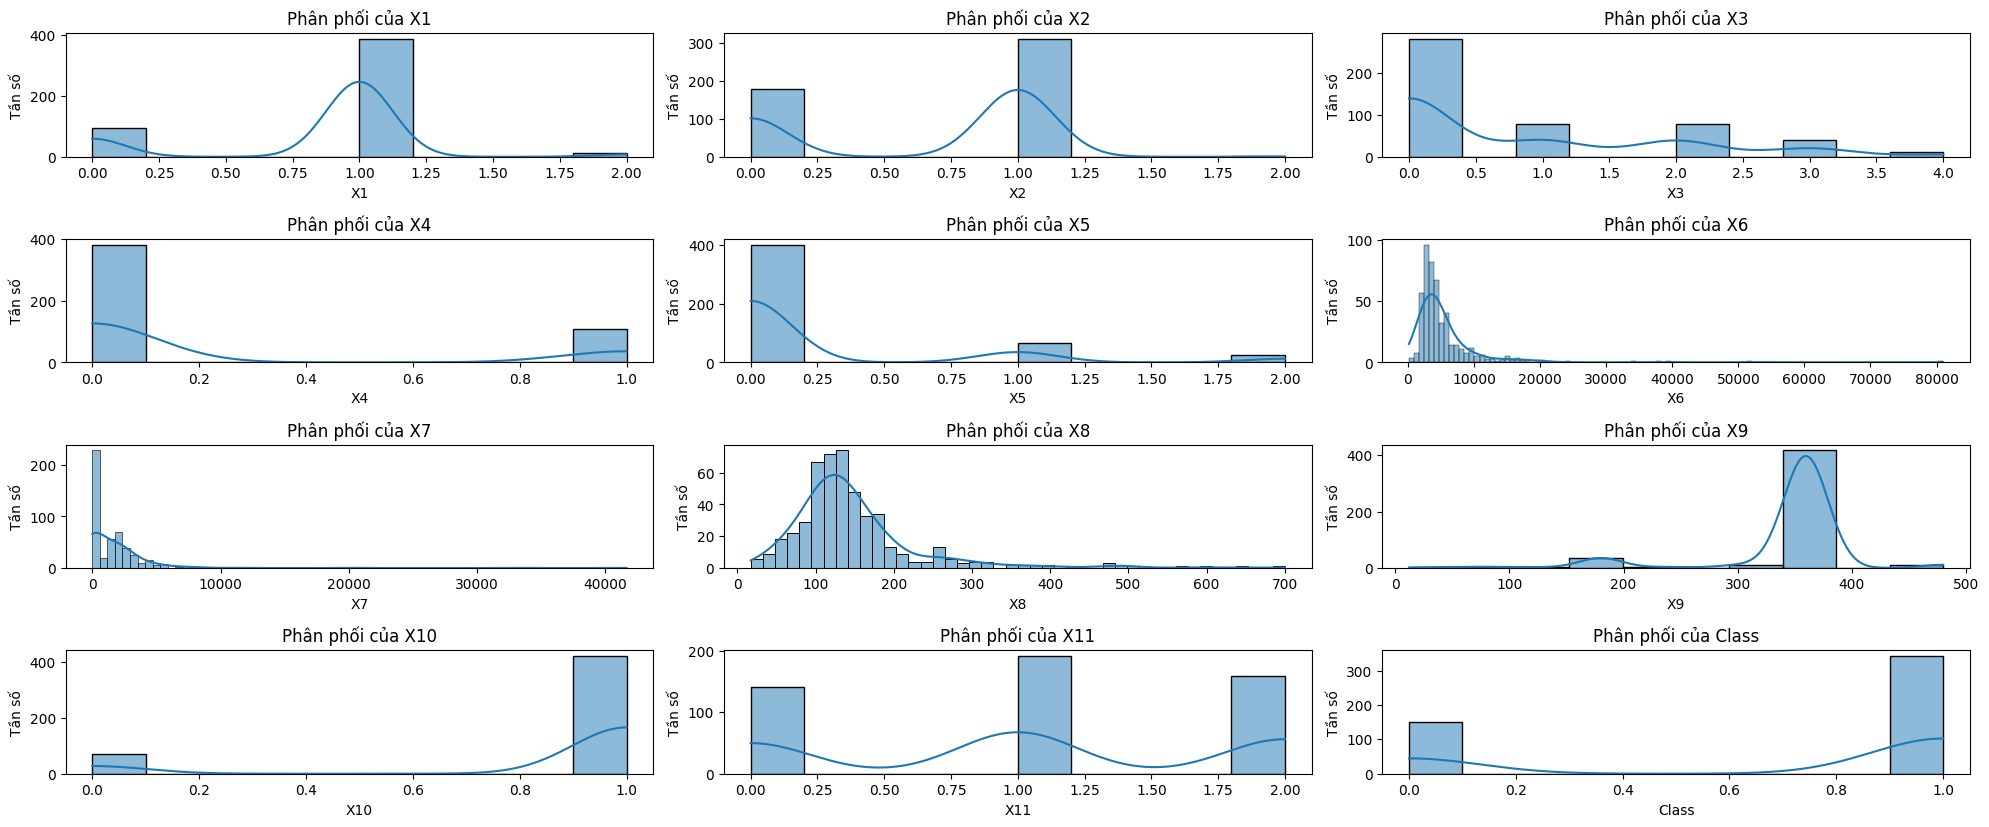

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lấy danh sách các cột
num_features = train_data.columns

plt.figure(figsize=(20, 10))
for i, feature in enumerate(num_features, 1):
    plt.subplot(len(num_features)//3 + 1, 3, i)
    sns.histplot(train_data[feature], kde=True)
    plt.title(f'Phân phối của {feature}')
    plt.xlabel(feature)
    plt.ylabel('Tần số')
plt.tight_layout()
plt.show()
